# 01-通道替换

In [1]:
import cv2
from matplotlib import pyplot as plt

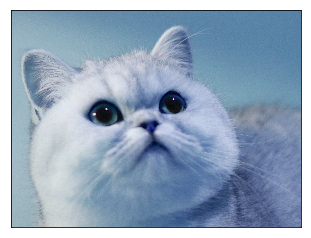

In [2]:
img = cv2.imread('../picture/cat.jpg')

plt.xticks([])
plt.yticks([])     #不显示坐标轴
plt.imshow(img)
plt.show()

In [4]:
#test (RGB)->(BGR)
#cv2.imread读取方式为BGR

def BGR2RGB(img):
    
    #RGB通道赋值
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    
    #BGR->RGB
    img[:, :, 0] = r
    img[:, :, 1] = g
    img[:, :, 2] = b
    
    return img

In [5]:
#BGR->RGB

out1 = BGR2RGB(img)

In [6]:
cv2.imwrite('../picture/cat_result.jpg', out1)
cv2.namedWindow("result", 0);
cv2.resizeWindow("result", (800, 600));
cv2.imshow("result", out1)
cv2.waitKey(0)
cv2.destroyAllWindows

# cv2.waitKey(x) 参数：无限地等待一个按键产生的事件即它为正数时，等待延迟时间单位为毫秒(ms)。
# 如果在指定的时间之前没有按下键，则返回-1。如果x=0，那么无限等待下去，直到有按键按下。

<function destroyAllWindows>

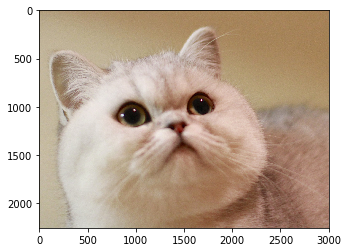

In [7]:
plt.xticks([])
plt.yticks([])
plt.imshow(out1)
plt.show()

# 02-灰度化（Grayscale）

In [3]:
import numpy as np

In [ ]:
#灰度化

def BGR2GRAY(img):
    
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    
    #Y = 0.2126 * R + 0.7152 * G + 0.0722 * B
    out = 0.2126 * r +0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)
    
    return out

In [ ]:
img_out = cv2.imread('../picture/cat.jpg').astype(np.float)

out2 = BGR2GRAY(img_out)

# plt.xticks([])
# plt.yticks([])
# plt.imshow(out2)
# plt.show()

In [ ]:
cv2.imwrite('../picture/cat_result2.jpg', out2)
cv2.namedWindow("result", 0);
cv2.resizeWindow("result", (800, 600));
cv2.imshow("result", out2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 03-二值化（Thresholding）

In [19]:
#二值化

#阈值 th，大于th为1，小于th为0

def binarization(img, th):
    
    img[img < th] = 0
    img[img > th] = 255
    
    return img

In [26]:
#读取图片

#读取彩色图片
#创建数组时指定数据类型，否则默认uint8乘法运算会溢出
img_new = cv2.imread('../picture/cat.jpg').astype(np.float32)

#读取灰度图片
img_gray  = cv2.imread('../picture/cat_result2.jpg')

# plt.imshow(img_new)
# plt.show()

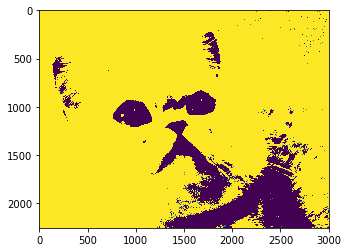

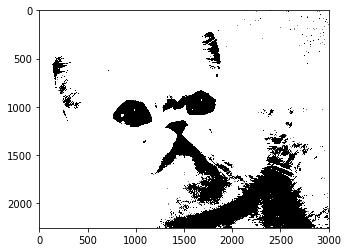

In [29]:
#设置阈值为128

#读取彩色图片先灰度化再进行二值化
out_new = BGR2GRAY(img_new)
out_new = binarization(out_new, 128)

#直接读取灰度图片二值化
out_gray = binarization(img_gray, 128)

out3 = BGR2GRAY(img_new)
out3 = binarization(out3, 128)

plt.xticks([])
plt.yticks([])
plt.imshow(out_new)
plt.show()

plt.imshow(out_gray)
plt.show()

In [23]:
cv2.imwrite("../picture/cat_result3.jpg", out3)
cv2.namedWindow("result", 0);
cv2.resizeWindow("result", (800, 600));
cv2.imshow("result", out3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# opencv 读取数据相关说明

## 默认读取颜色通道为：BGR
## 读取数据类型为numpy数组，是unit8的整数数据类型，范围是0-255

## plt默认显示的颜色通道顺序为：RBG

# 灰度化

### 在RGB模型中，如果R=G=B时，则彩色表示一种灰度颜色，其中R=G=B的值叫灰度值，因此，灰度图像每个像素只需一个字节存放灰度值（又称强度值、亮度值），灰度范围为0-255。
### 四种方法：分量法、最大值法、平均值法、加权平均法

#### 最大值法：将彩色图像中的三分量亮度的最大值作为灰度图的灰度值
                                 f(i,j)=max(R(i,j),G(i,j),B(i,j))

#### 平均值法：将彩色图像中的三分量亮度求平均得到一个灰度值
                                   f(i,j)=(R(i,j)+G(i,j)+B(i,j)) /3

#### 加权平均：根据重要性及其它指标，将三个分量以不同的权值进行加权平均，人眼对绿色的敏感最高，对蓝色敏感最低
                                      f(i,j)=0.30R(i,j)+0.59G(i,j)+0.11B(i,j))